## IMDB data analysis with scikit-learn & custom algorithms
### Multilayer Perceptron (MLP)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

We define the hyperparameters required for the data that we will use below.

In [19]:
n = 100
m = 3000
k = 50

We take the data from the IMDB database, ignoring the most n frequently used words  and the least k frequently used words.

(These are the hyperparameters we defined above.)

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=m-k, skip_top=n)

word_index = tf.keras.datasets.imdb.get_word_index()
index2word = dict((i + 3, word) for (word, i) in word_index.items())
index2word[0] = '[pad]'
index2word[1] = '[bos]'
index2word[2] = '[oov]'
x_train = np.array([' '.join([index2word[idx] for idx in text]) for text in x_train])
x_test = np.array([' '.join([index2word[idx] for idx in text]) for text in x_test])

### Creation of binary vectors
We modify the data we got so that they become binary vectors. These vectors consist of 0 and 1, with 1 meaning that the word exists in the text, while 0 means it does not.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# min-df --> when building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
binary_vectorizer = CountVectorizer(binary=True, min_df=100)
x_train_binary = binary_vectorizer.fit_transform(x_train)
x_test_binary = binary_vectorizer.transform(x_test)
print(
    'Vocabulary size:', len(binary_vectorizer.vocabulary_)
)
voc = len(binary_vectorizer.vocabulary_)

Vocabulary size: 2781


X is an array of vectors (reviews), with each vector representing words.
Y is a vector of labels (0 or 1) where 0 is a negative reviews and 1 a positive one.

$$X = \begin{bmatrix} \vec{x_{1}} \\ \vdots \\ \vec{x_{m}} \end{bmatrix}\, \, \,
y = \begin{bmatrix} y_{1} \\ \vdots \\ y_{m} \end{bmatrix}$$

In [5]:
x_train_binary = x_train_binary.toarray()
x_test_binary = x_test_binary.toarray()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.utils import plot_model
from IPython.display import Image

### Implementation of the MLP model

In [31]:
class MLP:
    def __init__(self):
        self.model = None

    def create_model(self, n_words):
        self.model = Sequential()
        self.model.add(Embedding(input_dim=n_words, output_dim=5,input_length=n_words))
        self.model.add(Dense(32, activation='relu', input_shape=(n_words,)))
        self.model.add(tf.keras.layers.Dropout(rate=0.2))
        self.model.add(Dense(32, activation='relu'))
        self.model.add(Flatten())
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    def fit(self,x, y):
        h = self.model.fit(x, y, epochs=4, batch_size=32, validation_split=0.2)
        return h
    
    def predict(self,x):
        p = self.model.predict(x)
        return (p > 0.5).astype(int)

In [8]:
from visualizations import *

In [32]:
model = MLP()
model.create_model(voc)
history = model.fit(x_train_binary, y_train)

Epoch 1/4
625/625 [==============================] - 34s 53ms/step - loss: 0.3847 - accuracy: 0.8311 - val_loss: 0.3151 - val_accuracy: 0.8744
Epoch 2/4
625/625 [==============================] - 35s 55ms/step - loss: 0.2738 - accuracy: 0.8888 - val_loss: 0.3192 - val_accuracy: 0.8724
Epoch 3/4
625/625 [==============================] - 34s 54ms/step - loss: 0.2585 - accuracy: 0.8946 - val_loss: 0.3208 - val_accuracy: 0.8714
Epoch 4/4
625/625 [==============================] - 32s 51ms/step - loss: 0.2497 - accuracy: 0.8972 - val_loss: 0.3346 - val_accuracy: 0.8648



### Results of MLP on the overall evaluation data

In [33]:
y = model.predict(x_test_binary)
print(classification_report(y_test, y))

782/782 [==============================] - 11s 14ms/step
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     12500
           1       0.87      0.84      0.85     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [34]:
dat = classification_data(model, x_train_binary, y_train, x_test_binary, y_test, 5)

Epoch 1/4
125/125 [==============================] - 8s 61ms/step - loss: 0.2186 - accuracy: 0.9143 - val_loss: 0.2079 - val_accuracy: 0.9160
Epoch 2/4
125/125 [==============================] - 9s 74ms/step - loss: 0.1650 - accuracy: 0.9402 - val_loss: 0.2363 - val_accuracy: 0.9050
Epoch 3/4
125/125 [==============================] - 9s 69ms/step - loss: 0.1244 - accuracy: 0.9572 - val_loss: 0.2872 - val_accuracy: 0.8820
Epoch 4/4
782/782 [==============================] - 13s 17ms/step
Epoch 1/4
250/250 [==============================] - 16s 65ms/step - loss: 0.2156 - accuracy: 0.9196 - val_loss: 0.2827 - val_accuracy: 0.8815
Epoch 2/4
250/250 [==============================] - 17s 66ms/step - loss: 0.1692 - accuracy: 0.9366 - val_loss: 0.3186 - val_accuracy: 0.8795
Epoch 3/4
250/250 [==============================] - 15s 61ms/step - loss: 0.1534 - accuracy: 0.9413 - val_loss: 0.3627 - val_accuracy: 0.8700
Epoch 4/4
782/782 [==============================] - 12s 16ms/step
Epoch 1/4
3

### Results of the MLP
It is examined in the test data and the results are shown in the table below. A comparison is also made between the prediction results of the training data and the test data.

,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test
5000,0.97,0.84,0.96,0.84,0.97,0.84,0.97,0.84
10000,0.95,0.84,0.95,0.84,0.95,0.84,0.95,0.84
15000,0.93,0.84,0.93,0.85,0.92,0.84,0.93,0.84
20000,0.92,0.85,0.92,0.85,0.92,0.85,0.92,0.85
25000,0.91,0.85,0.89,0.84,0.93,0.87,0.91,0.85


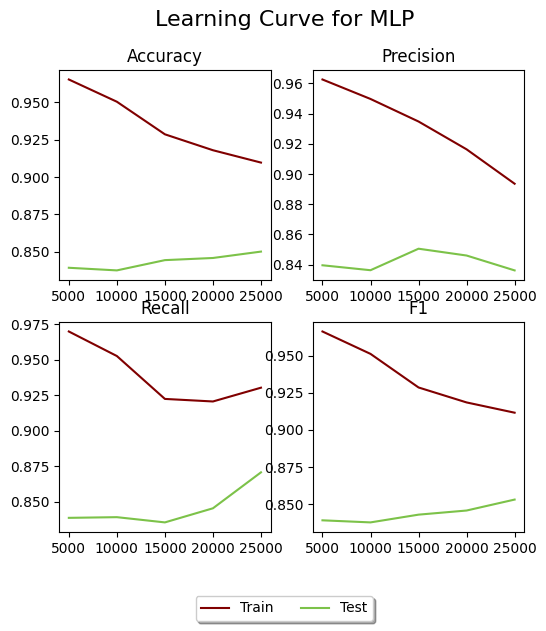

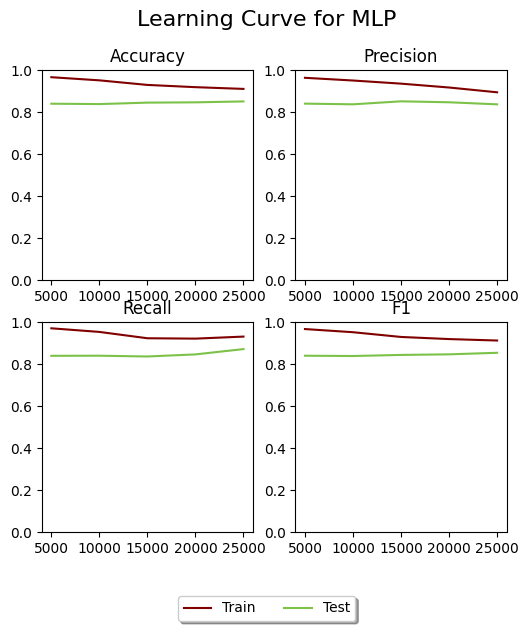

In [35]:
dat_table = classification_table(dat, x_train_binary)
ipd.display(dat_table)

classification_plots(dat)
r = classification_plots(dat, True)

Below is the summary of the model we have created.

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2781, 5)           13905     
                                                                 
 dense (Dense)               (None, 2781, 32)          192       
                                                                 
 dropout (Dropout)           (None, 2781, 32)          0         
                                                                 
 dense_1 (Dense)             (None, 2781, 32)          1056      
                                                                 
 flatten (Flatten)           (None, 88992)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 88993     
                                                                 
Total params: 104146 (406.82 KB)
Trainable params: 10414

### Comparison of MLP with Bernoulli Naive Bayes
Both are considered on the same training and evaluation data and the difference results are shown in the table below. We observe that both Naive Bayes and MLP do equally well on the evaluation data with MLP doing slightly better.

,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test
5000,0.10,0.00,0.08,0.01,0.10,0.01,0.09,0.00
10000,0.08,0.01,0.09,0.01,0.08,0.01,0.08,0.01
15000,0.07,0.01,0.07,0.00,0.05,0.00,0.07,0.01
20000,0.06,0.00,0.06,0.00,0.06,0.01,0.06,0.00
25000,0.05,0.00,0.04,0.01,0.06,0.02,0.05,0.00


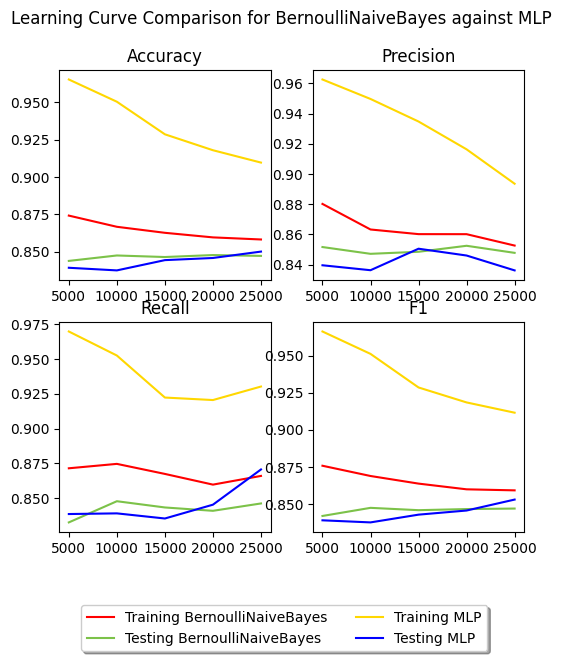

In [36]:
nb_data = {'estimator': 'BernoulliNaiveBayes', 'split_size': 5000, 'splits': 5, 'test_predictions': np.array([0, 1, 1, ..., 0, 0, 1]), 'train_accuracy': [0.8742, 0.8667, 0.8626666666666667, 0.8596, 0.8582], 'test_accuracy': [0.84384, 0.84748, 0.84644, 0.84776, 0.8472], 'train_precision': [0.8802062673542245, 0.86328125, 0.8602079768329604, 0.8601775206941259, 0.8526423564621565], 'test_precision': [0.8516609392898052, 0.8471744864519223, 0.8485311871227365, 0.8524975673045735, 0.8478121493829139], 'train_recall': [0.8715632364493323, 0.874727884425094, 0.8675162617814948, 0.8598345130096701, 0.86608], 'test_recall': [0.83272, 0.84792, 0.84344, 0.84104, 0.84632], 'train_f1': [0.8758634300374976, 0.8689668730954486, 0.8638466622604098, 0.8600059826503141, 0.8593086478549034], 'test_f1': [0.8420839737885284, 0.8475470792851144, 0.8459779338014041, 0.8467300257731958, 0.8470654175674593], 'final_cm': np.array([[10601,  1899],[ 1921, 10579]], dtype=np.int64)}
nb_data_table = classification_table(nb_data, x_test_binary)
ipd.display(abs(nb_data_table - dat_table))

x=classification_plots_compare(nb_data, dat)


### Comparison of MLP with Logistic Regression
Both are considered on the same training and evaluation data and the difference results are shown in the table below. We observe that both Logistic Regression and MLP perform equally well on the evaluation data with MLP doing better.

,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test
5000,0.13,0.03,0.17,0.07,0.05,0.06,0.12,0.01
10000,0.11,0.01,0.13,0.03,0.08,0.01,0.10,0.01
15000,0.09,0.01,0.09,0.02,0.08,0.01,0.09,0.01
20000,0.08,0.02,0.09,0.02,0.07,0.02,0.08,0.02
25000,0.08,0.02,0.04,0.01,0.12,0.07,0.08,0.03


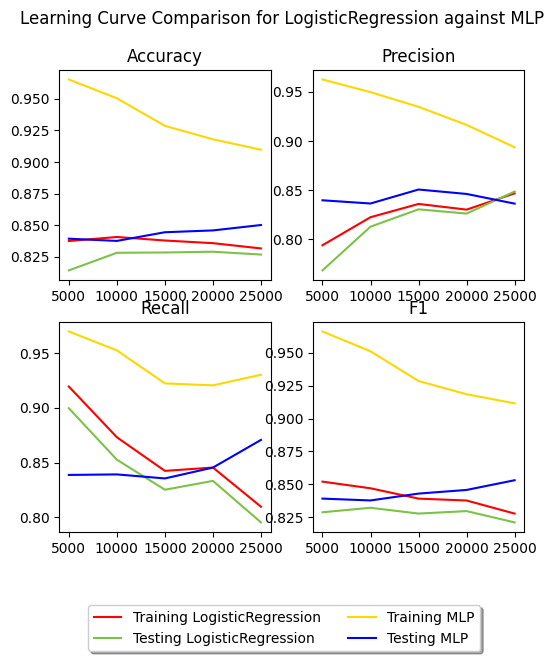

In [37]:
lg_data = {'estimator': 'LogisticRegression', 'split_size': 5000, 'splits': 5, 'test_predictions': [0,1,1,1,0],'train_accuracy': [0.8374, 0.8406, 0.8378, 0.8357, 0.83152], 'test_accuracy': [0.81412, 0.82808, 0.82832, 0.82892, 0.82668], 'train_precision': [0.7938284164123431, 0.8223671947809879, 0.8358798735511064, 0.8300871097190956, 0.8466622051196252], 'test_precision': [0.7682218730787622, 0.8127192313558029, 0.8303815810658509, 0.8260766119438496, 0.8485107109328326], 'train_recall': [0.9194815396700707, 0.8731446665347319, 0.8424266560467277, 0.8454790150533347, 0.80968], 'test_recall': [0.89968, 0.85264, 0.8252, 0.83328, 0.79536], 'train_f1': [0.8520473157415832, 0.8469955845651757, 0.8391404958677685, 0.8377123666534967, 0.8277582399607425], 'test_f1': [0.8287704042153359, 0.8322011400015615, 0.8277826819677393, 0.8296626707555, 0.8210761035636123]}
lg_data_table = classification_table(lg_data, x_test_binary)
ipd.display(abs(lg_data_table - dat_table))

x=classification_plots_compare(lg_data, dat)

### Comparison of MLP with Random Forest
Both are considered on the same training and evaluation data and the difference results are shown in the table below. We observe that both Random Forest and MLP do equally well on the evaluation data with MLP doing better.

,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test
5000,0.07,0.24,0.07,0.24,0.05,0.21,0.06,0.23
10000,0.04,0.22,0.05,0.22,0.03,0.20,0.04,0.21
15000,0.02,0.22,0.03,0.23,0.00,0.20,0.02,0.21
20000,0.02,0.23,0.02,0.24,0.01,0.22,0.02,0.23
25000,0.01,0.22,0.01,0.22,0.02,0.23,0.00,0.22


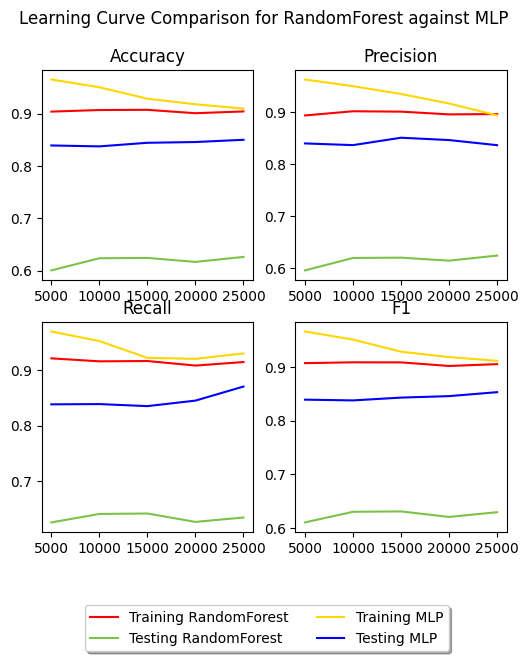

In [41]:
rf_data = {'estimator': 'RandomForest', 'split_size': 5000, 'splits': 5, 'test_predictions': np.array([1, 1, 0, ..., 0, 0, 0]), 'train_accuracy': [0.904, 0.907, 0.9074, 0.9009, 0.90432], 'test_accuracy': [0.60032, 0.62356, 0.6242, 0.61656, 0.62612], 'train_precision': [0.8933739527798934, 0.901460564751704, 0.9007304983042004, 0.895450525695195, 0.8960194326908009], 'test_precision': [0.5953467153284672, 0.6192572002161996, 0.6198379004245466, 0.6141134085213033, 0.623870511510961], 'train_recall': [0.9214454045561665, 0.9160894518108055, 0.9166334793574937, 0.908483700528362, 0.9148], 'test_recall': [0.6264, 0.6416, 0.6424, 0.62728, 0.6352], 'train_f1': [0.9071925754060326, 0.908716136631331, 0.9086124087110995, 0.9019200316706254, 0.905312326814979], 'test_f1': [0.610478715109933, 0.6302306392676122, 0.6309173050481242, 0.6206268798480291, 0.6294842827129662]}
rf_data_table = classification_table(rf_data, x_test_binary)
ipd.display(abs(rf_data_table - dat_table))

x=classification_plots_compare(rf_data, dat)

### MLP Loss function over each epoch.
With each epoch, we observe that the loss in the test data drastically decreases a lot, while in the evaluation data it gradually increases slightly.

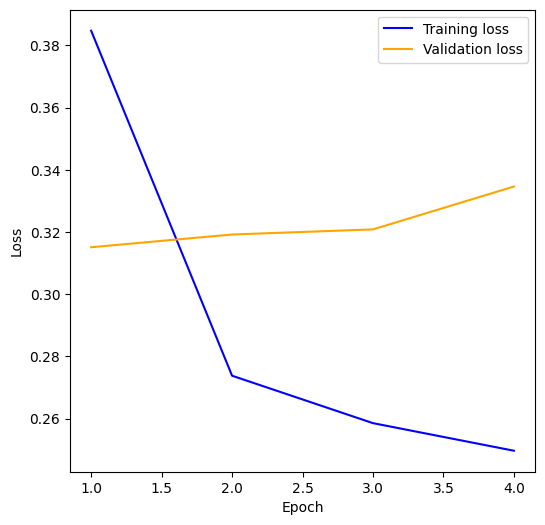

In [38]:
x = loss_plot(history, 'loss')